In [2]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from openff.units import unit
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize
from sklearn.metrics import r2_score

def density_scatter_plot(x, y, **kwargs):
    """
    :param x: data positions on the x axis
    :param y: data positions on the y axis
    :return: matplotlib.collections.PathCollection object
    """
    # Kernel Density Estimate (KDE)
    values = np.vstack((x, y))
    kernel = gaussian_kde(values)
    kde = kernel.evaluate(values)

    # create array with colors for each data point
    norm = Normalize(vmin=kde.min(), vmax=kde.max())
    colors = cm.ScalarMappable(norm=norm, cmap='viridis').to_rgba(kde)

    # override original color argument
    kwargs['color'] = colors

    return plt.scatter(x, y, **kwargs)

def equalityline(x, y, ax = None, **kwargs):
    x0, x1 = min(x), max(x)
    y0, y1 = min(y), max(y)
    lims = [min(x0, y0), max(x1, y1)]
    ax = ax or plt.gca()
    ax.plot(lims, lims, **kwargs)

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    
def kde(x, y, ax = None, **kwargs):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        x = np.array(x)
        y = np.array(y)
    ax = ax or plt.gca()
    kernel = stats.gaussian_kde(x)(y)
    ax.scatter(x, y, c=kernel, s=5)
    
def density_scatter_plot(x, y, **kwargs):
    values = np.vstack((x, y))
    kernel = gaussian_kde(values)
    kde = kernel.evaluate(values)

    norm = Normalize(vmin=kde.min(), vmax=kde.max())
    colors = cm.ScalarMappable(norm=norm, cmap='viridis').to_rgba(kde)

    kwargs['color'] = colors

    return plt.scatter(x, y, **kwargs)

In [3]:
df_esp = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/test_models_gas.parquet')
df_esp

,mbis_charges,predicted_charges,molecule,geometry,molblock,mol_id,qm_dipoles_magnitude,mbis_dipoles_magnitude,predicted_dipoles,qm_esp,...,charge_model_esp,charge_model_esp_rmse,dipole_model_charges,dipole_model_dipoles,dipole_model_esp,dipole_model_esp_rmse,esp_model_charges,esp_model_dipoles,esp_model_esp,esp_model_esp_rmse
0,"[-0.22488003528642272, -0.1351402477596661, -0...",None,[H:16][C:3]1([C:2]2([C:1]([C:10]3([C:9]([C:6](...,"[1.25270397, -3.11433522, -0.27348176, 0.53779...",\n RDKit 3D\n\n 30 32 0 0 0 0...,def1e279243bea4f5b6495cd8f7f4345daf2d581b1cb16...,3.601982,0.377016,NaN,None,...,"[0.14572031207075495, 0.14601825228578355, 0.1...",3.585797,"[-0.23802222311496735, -0.12375440448522568, -...",3.523137e+00,"[0.136343437582518, 0.13721805773501908, 0.135...",2.087995,"[-0.2419247031211853, -0.13747482001781464, -0...",3.499249e+00,"[0.13676156953723365, 0.13758768218319734, 0.1...",2.209530
1,"[-0.33238438551204774, -0.3323754494149188, 0....",None,[H:11][C:1]1([C:2]([C:3]12[C:4]([C:5]3([C:6]24...,"[-1.33170496, -1.98458289, -4.12140476, 1.4956...",\n RDKit 3D\n\n 24 27 0 0 0 0...,d783f828d07657bf7b21f319243045c81179c8fbf25707...,0.071379,0.213495,NaN,None,...,"[-0.00284244815897041, -0.0016708420723224383,...",1.085380,"[-0.33716994524002075, -0.33716994524002075, 0...",6.512929e-02,"[-0.0029810178934355845, -0.001748177724317248...",1.091506,"[-0.3393256366252899, -0.3393256366252899, 0.0...",5.683724e-02,"[-0.0027129150524250046, -0.001523750149415477...",1.088770
2,"[0.30152651342248465, -0.23743178438605075, -0...",None,[H:10][c:1]1[c:2]2=[C:3]([C:4]([N:5]=[c:6]2[n:...,"[3.15546607, 0.91440317, -0.09809173, 0.490575...",\n RDKit 3D\n\n 14 15 0 0 0 0...,1cef51c39f3c2bfabf3dfbd2a4e1785db48d679246bd24...,1.739315,0.301041,NaN,None,...,"[-0.008398995479846454, -0.009220117795108082,...",2.476459,"[0.2760153114795685, -0.210404634475708, -0.14...",1.765437e+00,"[-0.010664505410775908, -0.01160929676203345, ...",2.038646,"[0.26394322514533997, -0.1712387502193451, -0....",1.647689e+00,"[-0.00860247595260851, -0.009427144174545299, ...",2.120094
3,"[-0.2507532752347685, -0.05450358150607305, -0...",None,[H:11][C:1]1([C:2]2([C:3]([C:4]([C:5]1([C:6]3(...,"[0.15106329, -0.93636657, 3.16441462, -0.09645...",\n RDKit 3D\n\n 22 24 0 0 0 0...,4de7de9b4ff2bb85b055dedd6aae06047f7c8a6fb5c8d8...,0.533277,0.334996,NaN,None,...,"[-0.014190047072791144, -0.016361639346059012,...",2.210853,"[-0.22575120627880096, -0.04964730143547058, -...",5.842438e-01,"[-0.01103372772239545, -0.012610153043316188, ...",1.316463,"[-0.23672282695770264, -0.03998645395040512, -...",6.428218e-01,"[-0.011823202149995436, -0.01332924694883631, ...",1.383529
4,"[-0.29357569096172537, -0.2935796471919738, -0...",None,[H:4][C:1]1([C:2]([C:3]1([H:8])[H:9])([H:6])[H...,"[1.12451814, -1.34731691, 1.05257344, 3.926744...",\n RDKit 3D\n\n 9 9 0 0 0 0...,92f21c93e8e02804b7a30deeb1e8f3462f0fefc183520a...,0.000030,0.156853,NaN,None,...,"[-0.0019079774117091717, -0.001040385308596517...",1.403582,"[-0.3011598587036133, -0.3011598587036133, -0....",3.013224e-07,"[-0.0019445247179152752, -0.001060312372218832...",1.390773,"[-0.30292972922325134, -0.30292972922325134, -...",2.849609e-07,"[-0.0019559470329927157, -0.001066538961233927...",1.386931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,"[-0.6255876249923304, 1.4873442452131167, -0.6...",None,[O:1]=[S:2]1(=[O:3])[N:4]=[C:5]([H:13])[N:6]([...,"[-4.2667249, -3.77187093, 1.01001634, -3.39815...",\n RDKit 3D\n\n 15 16 0 0 0 0...,9f689d9f98a6ca49d4867a60aafabdff89fbb82bf13a81...,3.268596,0.404008,NaN,None,...,"[-0.03324643801541432, -0.03241175290172923, -...",2.265184,"[-0.580990195274353, 1.4990103244781494, -0.58...",3.204237e+00,"[-0.02762570374058465, -0.026988792632195724, ...",1.505947,"[-0.5988500118255615, 1.5164213180541992, -0.5...",3.340650e+00,"[-0.02905659557854345, -0.02837564329972734, -...",1.635582
10288,"[-1.0542912996313811, 1.8402112653415987, -1.0.

In [4]:
df_dipole = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/water_charge_dipole_test.parquet')
df_charge = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/water_esp_charge_dipole_test.parquet')

In [5]:
def calculate_rmse_metrics_single_df(df, models):
    """
    Calculate RMSE metrics for multiple models in a single dataset.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing model predictions and reference data.
    models : list of str
        List of model names to compare.
    
    Returns
    -------
    pd.DataFrame
        Summary DataFrame containing RMSE metrics for each model.
    """
    metrics_list = []

    for model_name in models:
        # Ensure numeric columns are cleaned of NaN/Inf
        esp_rmse_col = f"{model_name}_esp_rmse"
        df[esp_rmse_col] = df[esp_rmse_col].replace([np.inf, -np.inf], np.nan).dropna()
        
        # Compute Dipole RMSE
        dipole_rmse = np.sqrt(
            np.mean(
                (df['qm_dipoles_magnitude'] - df[f"{model_name}_dipoles"].apply(np.linalg.norm)) ** 2
            )
        )
        
        # Compute Charge RMSE molecule by molecule
        charge_rmse_list = []
        for mbis, predicted in zip(df['mbis_charges'], df[f"{model_name}_charges"]):
            # Ensure both arrays have the same length and compute RMSE for this molecule
            if len(mbis) == len(predicted):
                charge_rmse_list.append(np.sqrt(np.mean((np.array(mbis) - np.array(predicted)) ** 2)))
        charge_rmse = np.mean(charge_rmse_list)  # Average RMSE over all molecules
        
        # Compute ESP RMSE
        esp_rmse = df[esp_rmse_col].mean()  # Already precomputed RMSE in the column
        
        # Append metrics for this model
        metrics_list.append({
            'Model': model_name,
            'Dipole RMSE': dipole_rmse,
            'Charge RMSE': charge_rmse,
            'ESP RMSE': esp_rmse
        })

    # Combine results into a summary DataFrame
    summary_df = pd.DataFrame(metrics_list)
    return summary_df
models = ['charge_model', 'dipole_model', 'esp_model']

# Assuming `df` contains columns like 'charge_model_charges', 'charge_model_dipoles', etc.
summary_df = calculate_rmse_metrics_single_df(df_esp, models)
print(summary_df)

          Model  Dipole RMSE  Charge RMSE  ESP RMSE
0  charge_model     0.293738     0.015496  2.380642
1  dipole_model     0.164807     0.028474  1.952594
2     esp_model     0.156994     0.030757  1.794755


In [6]:

summary_df

,Model,Dipole RMSE,Charge RMSE,ESP RMSE
0,charge_model,0.293738,0.015496,2.380642
1,dipole_model,0.164807,0.028474,1.952594
2,esp_model,0.156994,0.030757,1.794755


In [7]:
df_gas = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/test_models_gas.parquet')
df_gas

,mbis_charges,predicted_charges,molecule,geometry,molblock,mol_id,qm_dipoles_magnitude,mbis_dipoles_magnitude,predicted_dipoles,qm_esp,...,charge_model_esp,charge_model_esp_rmse,dipole_model_charges,dipole_model_dipoles,dipole_model_esp,dipole_model_esp_rmse,esp_model_charges,esp_model_dipoles,esp_model_esp,esp_model_esp_rmse
0,"[-0.22488003528642272, -0.1351402477596661, -0...",None,[H:16][C:3]1([C:2]2([C:1]([C:10]3([C:9]([C:6](...,"[1.25270397, -3.11433522, -0.27348176, 0.53779...",\n RDKit 3D\n\n 30 32 0 0 0 0...,def1e279243bea4f5b6495cd8f7f4345daf2d581b1cb16...,3.601982,0.377016,NaN,None,...,"[0.14572031207075495, 0.14601825228578355, 0.1...",3.585797,"[-0.23802222311496735, -0.12375440448522568, -...",3.523137e+00,"[0.136343437582518, 0.13721805773501908, 0.135...",2.087995,"[-0.2419247031211853, -0.13747482001781464, -0...",3.499249e+00,"[0.13676156953723365, 0.13758768218319734, 0.1...",2.209530
1,"[-0.33238438551204774, -0.3323754494149188, 0....",None,[H:11][C:1]1([C:2]([C:3]12[C:4]([C:5]3([C:6]24...,"[-1.33170496, -1.98458289, -4.12140476, 1.4956...",\n RDKit 3D\n\n 24 27 0 0 0 0...,d783f828d07657bf7b21f319243045c81179c8fbf25707...,0.071379,0.213495,NaN,None,...,"[-0.00284244815897041, -0.0016708420723224383,...",1.085380,"[-0.33716994524002075, -0.33716994524002075, 0...",6.512929e-02,"[-0.0029810178934355845, -0.001748177724317248...",1.091506,"[-0.3393256366252899, -0.3393256366252899, 0.0...",5.683724e-02,"[-0.0027129150524250046, -0.001523750149415477...",1.088770
2,"[0.30152651342248465, -0.23743178438605075, -0...",None,[H:10][c:1]1[c:2]2=[C:3]([C:4]([N:5]=[c:6]2[n:...,"[3.15546607, 0.91440317, -0.09809173, 0.490575...",\n RDKit 3D\n\n 14 15 0 0 0 0...,1cef51c39f3c2bfabf3dfbd2a4e1785db48d679246bd24...,1.739315,0.301041,NaN,None,...,"[-0.008398995479846454, -0.009220117795108082,...",2.476459,"[0.2760153114795685, -0.210404634475708, -0.14...",1.765437e+00,"[-0.010664505410775908, -0.01160929676203345, ...",2.038646,"[0.26394322514533997, -0.1712387502193451, -0....",1.647689e+00,"[-0.00860247595260851, -0.009427144174545299, ...",2.120094
3,"[-0.2507532752347685, -0.05450358150607305, -0...",None,[H:11][C:1]1([C:2]2([C:3]([C:4]([C:5]1([C:6]3(...,"[0.15106329, -0.93636657, 3.16441462, -0.09645...",\n RDKit 3D\n\n 22 24 0 0 0 0...,4de7de9b4ff2bb85b055dedd6aae06047f7c8a6fb5c8d8...,0.533277,0.334996,NaN,None,...,"[-0.014190047072791144, -0.016361639346059012,...",2.210853,"[-0.22575120627880096, -0.04964730143547058, -...",5.842438e-01,"[-0.01103372772239545, -0.012610153043316188, ...",1.316463,"[-0.23672282695770264, -0.03998645395040512, -...",6.428218e-01,"[-0.011823202149995436, -0.01332924694883631, ...",1.383529
4,"[-0.29357569096172537, -0.2935796471919738, -0...",None,[H:4][C:1]1([C:2]([C:3]1([H:8])[H:9])([H:6])[H...,"[1.12451814, -1.34731691, 1.05257344, 3.926744...",\n RDKit 3D\n\n 9 9 0 0 0 0...,92f21c93e8e02804b7a30deeb1e8f3462f0fefc183520a...,0.000030,0.156853,NaN,None,...,"[-0.0019079774117091717, -0.001040385308596517...",1.403582,"[-0.3011598587036133, -0.3011598587036133, -0....",3.013224e-07,"[-0.0019445247179152752, -0.001060312372218832...",1.390773,"[-0.30292972922325134, -0.30292972922325134, -...",2.849609e-07,"[-0.0019559470329927157, -0.001066538961233927...",1.386931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,"[-0.6255876249923304, 1.4873442452131167, -0.6...",None,[O:1]=[S:2]1(=[O:3])[N:4]=[C:5]([H:13])[N:6]([...,"[-4.2667249, -3.77187093, 1.01001634, -3.39815...",\n RDKit 3D\n\n 15 16 0 0 0 0...,9f689d9f98a6ca49d4867a60aafabdff89fbb82bf13a81...,3.268596,0.404008,NaN,None,...,"[-0.03324643801541432, -0.03241175290172923, -...",2.265184,"[-0.580990195274353, 1.4990103244781494, -0.58...",3.204237e+00,"[-0.02762570374058465, -0.026988792632195724, ...",1.505947,"[-0.5988500118255615, 1.5164213180541992, -0.5...",3.340650e+00,"[-0.02905659557854345, -0.02837564329972734, -...",1.635582
10288,"[-1.0542912996313811, 1.8402112653415987, -1.0.

In [8]:
df_water = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/water_test_models_over_test.parquet')
df_water

,mbis_charges,predicted_charges,molecule,geometry,molblock,mol_id,qm_dipoles_magnitude,mbis_dipoles_magnitude,predicted_dipoles,qm_esp,...,charge_model_esp,charge_model_esp_rmse,dipole_model_charges,dipole_model_dipoles,dipole_model_esp,dipole_model_esp_rmse,esp_model_charges,esp_model_dipoles,esp_model_esp,esp_model_esp_rmse
0,"[-0.3399217777771345, -0.19084372945602718, -0...",None,[H:10][C:1]1([C:2]2([C:3]1([C:4]3([C:5]([C:6](...,"[0.95770258, 3.3789888, 0.1895841, 2.80545208,...",\n RDKit 3D\n\n 20 22 0 0 0 0...,7f607dfd1946ac65f96a5adde9193c42b0823f8c1acf7c...,0.738033,0.331424,NaN,None,...,"[0.013527342271151916, 0.010547606907594513, 0...",1.352778,"[-0.32314154505729675, -0.20950843393802643, -...",0.717720,"[0.012518991647445118, 0.009523206349267217, 0...",1.476867,"[-0.3294525742530823, -0.21598535776138306, -0...",0.736032,"[0.012469216771653358, 0.00948839788157968, 0....",1.466185
1,"[0.442259143133993, -0.5220088280319388, 0.489...",None,[H:1][N:2]1[c:13]2[c:6]([n:7][c:8]([c:10]([n:1...,"[-6.84675074, -6.21371877, -0.26550788, -7.233...",\n RDKit 3D\n\n 13 14 0 0 0 0...,bd9adda5c0d19d657b1989d038fad726b055c33115f0fa...,2.275994,0.447251,NaN,None,...,"[0.003505047282564309, 0.003635791739528434, 0...",2.601401,"[0.43569380044937134, -0.4992575943470001, 0.4...",2.179527,"[0.0025952885524159995, 0.002732400889305118, ...",2.601364,"[0.4351973235607147, -0.49931854009628296, 0.4...",2.153468,"[0.0032095915447451035, 0.0033330214060580984,...",2.448563
2,"[0.2234567955184139, 0.30972164450355055, -0.6...",None,[H:23][C:10]12[C:8]3([N:7]([C:6]([N:12]1[H:25]...,"[-0.68548812, -2.88814626, -0.83083767, -2.843...",\n RDKit 3D\n\n 25 28 0 0 0 0...,2c5ce59184987156b9cbba7d0a26ab13a906e0085ce865...,2.126526,0.503188,NaN,None,...,"[0.10569282895079772, 0.10745616594678108, 0.1...",2.494186,"[0.192424938082695, 0.27646932005882263, -0.69...",2.151779,"[0.10174344121589536, 0.10348638017401753, 0.1...",1.929142,"[0.2225765734910965, 0.21637214720249176, -0.6...",1.988610,"[0.10147547750180931, 0.1033436574137819, 0.10...",1.900397
3,"[-0.1578020739474905, 0.5508853332222636, -0.4...",None,[H:14][N:6]1[C:2]2=[N:3][N:4]([N:5]=[C:1]2[C:1...,"[0.97763646, -1.77420977, 0.22259666, -1.55499...",\n RDKit 3D\n\n 16 17 0 0 0 0...,daa0f13bfa6510eca06036bc8ff9e778876f065bb5ee99...,3.628475,0.472993,NaN,None,...,"[0.016683269162457073, 0.004535158416392792, 0...",2.733206,"[-0.14138595759868622, 0.5118312835693359, -0....",3.641716,"[0.015074606716481363, 0.0009521210856499317, ...",2.156758,"[-0.10456862300634384, 0.5183217525482178, -0....",3.632432,"[0.013230485834359039, -0.0009931007863839267,...",2.069414
4,"[-0.19614842941148442, -0.1960964746383522, -0...",None,[H:11][C:1]12[C:2]3([C:3]4([C:4]1([C:5]5([C:6]...,"[-2.0747191, -1.1381894, 1.05725752, 0.7232284...",\n RDKit 3D\n\n 20 24 0 0 0 0...,96991e996a3fd18d403235c1e5b74fff39a6f3091af2df...,1.071492,0.299124,NaN,None,...,"[0.011925962822929721, 0.013600060350614101, 0...",1.275638,"[-0.16446077823638916, -0.16446071863174438, -...",1.117131,"[0.013713138516131566, 0.015053791973893959, 0...",1.393624,"[-0.16232483088970184, -0.16232478618621826, -...",1.124461,"[0.012884417995313506, 0.014332442800490314, 0...",1.219499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,"[-0.4482282064174735, -0.2099912020713029, 0.0...",None,[O:1]([C:2]([I:3])([I:4])[I:5])[H:6],"[-1.32478867, -0.22320627, -1.88418994, 0.3258...",\n RDKit 3D\n\n 6 5 0 0 0 0...,1953e4d9be10fd7d1416967e89b4bfde650dc3bd7ee47e...,0.600641,0.228020,NaN,None,...,"[0.002800657638863446, 0.003600080774981654, 0...",3.616721,"[-0.4543636441230774, -0.0986480563879013, 0.0...",0.792495,"[0.003153260480951041, 0.004187249933885444, 0...",3.265795,"[-0.40979158878326416, -0.1887810081243515, 0....",0.748450,"[0.0029812951010743586, 0.0038959384152832113,...",3.143720
10288,"[-0.7429159951470772, 0.8759295222175197, -0.7...",None,[O:1]=[C:2]([O-:3])[C:4]1=[C:8]([C:9]([I:10])(...,"[

In [9]:
df_gas= pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/test_models_gas.parquet')
df_gas

,mbis_charges,predicted_charges,molecule,geometry,molblock,mol_id,qm_dipoles_magnitude,mbis_dipoles_magnitude,predicted_dipoles,qm_esp,...,charge_model_esp,charge_model_esp_rmse,dipole_model_charges,dipole_model_dipoles,dipole_model_esp,dipole_model_esp_rmse,esp_model_charges,esp_model_dipoles,esp_model_esp,esp_model_esp_rmse
0,"[-0.22488003528642272, -0.1351402477596661, -0...",None,[H:16][C:3]1([C:2]2([C:1]([C:10]3([C:9]([C:6](...,"[1.25270397, -3.11433522, -0.27348176, 0.53779...",\n RDKit 3D\n\n 30 32 0 0 0 0...,def1e279243bea4f5b6495cd8f7f4345daf2d581b1cb16...,3.601982,0.377016,NaN,None,...,"[0.14572031207075495, 0.14601825228578355, 0.1...",3.585797,"[-0.23802222311496735, -0.12375440448522568, -...",3.523137e+00,"[0.136343437582518, 0.13721805773501908, 0.135...",2.087995,"[-0.2419247031211853, -0.13747482001781464, -0...",3.499249e+00,"[0.13676156953723365, 0.13758768218319734, 0.1...",2.209530
1,"[-0.33238438551204774, -0.3323754494149188, 0....",None,[H:11][C:1]1([C:2]([C:3]12[C:4]([C:5]3([C:6]24...,"[-1.33170496, -1.98458289, -4.12140476, 1.4956...",\n RDKit 3D\n\n 24 27 0 0 0 0...,d783f828d07657bf7b21f319243045c81179c8fbf25707...,0.071379,0.213495,NaN,None,...,"[-0.00284244815897041, -0.0016708420723224383,...",1.085380,"[-0.33716994524002075, -0.33716994524002075, 0...",6.512929e-02,"[-0.0029810178934355845, -0.001748177724317248...",1.091506,"[-0.3393256366252899, -0.3393256366252899, 0.0...",5.683724e-02,"[-0.0027129150524250046, -0.001523750149415477...",1.088770
2,"[0.30152651342248465, -0.23743178438605075, -0...",None,[H:10][c:1]1[c:2]2=[C:3]([C:4]([N:5]=[c:6]2[n:...,"[3.15546607, 0.91440317, -0.09809173, 0.490575...",\n RDKit 3D\n\n 14 15 0 0 0 0...,1cef51c39f3c2bfabf3dfbd2a4e1785db48d679246bd24...,1.739315,0.301041,NaN,None,...,"[-0.008398995479846454, -0.009220117795108082,...",2.476459,"[0.2760153114795685, -0.210404634475708, -0.14...",1.765437e+00,"[-0.010664505410775908, -0.01160929676203345, ...",2.038646,"[0.26394322514533997, -0.1712387502193451, -0....",1.647689e+00,"[-0.00860247595260851, -0.009427144174545299, ...",2.120094
3,"[-0.2507532752347685, -0.05450358150607305, -0...",None,[H:11][C:1]1([C:2]2([C:3]([C:4]([C:5]1([C:6]3(...,"[0.15106329, -0.93636657, 3.16441462, -0.09645...",\n RDKit 3D\n\n 22 24 0 0 0 0...,4de7de9b4ff2bb85b055dedd6aae06047f7c8a6fb5c8d8...,0.533277,0.334996,NaN,None,...,"[-0.014190047072791144, -0.016361639346059012,...",2.210853,"[-0.22575120627880096, -0.04964730143547058, -...",5.842438e-01,"[-0.01103372772239545, -0.012610153043316188, ...",1.316463,"[-0.23672282695770264, -0.03998645395040512, -...",6.428218e-01,"[-0.011823202149995436, -0.01332924694883631, ...",1.383529
4,"[-0.29357569096172537, -0.2935796471919738, -0...",None,[H:4][C:1]1([C:2]([C:3]1([H:8])[H:9])([H:6])[H...,"[1.12451814, -1.34731691, 1.05257344, 3.926744...",\n RDKit 3D\n\n 9 9 0 0 0 0...,92f21c93e8e02804b7a30deeb1e8f3462f0fefc183520a...,0.000030,0.156853,NaN,None,...,"[-0.0019079774117091717, -0.001040385308596517...",1.403582,"[-0.3011598587036133, -0.3011598587036133, -0....",3.013224e-07,"[-0.0019445247179152752, -0.001060312372218832...",1.390773,"[-0.30292972922325134, -0.30292972922325134, -...",2.849609e-07,"[-0.0019559470329927157, -0.001066538961233927...",1.386931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,"[-0.6255876249923304, 1.4873442452131167, -0.6...",None,[O:1]=[S:2]1(=[O:3])[N:4]=[C:5]([H:13])[N:6]([...,"[-4.2667249, -3.77187093, 1.01001634, -3.39815...",\n RDKit 3D\n\n 15 16 0 0 0 0...,9f689d9f98a6ca49d4867a60aafabdff89fbb82bf13a81...,3.268596,0.404008,NaN,None,...,"[-0.03324643801541432, -0.03241175290172923, -...",2.265184,"[-0.580990195274353, 1.4990103244781494, -0.58...",3.204237e+00,"[-0.02762570374058465, -0.026988792632195724, ...",1.505947,"[-0.5988500118255615, 1.5164213180541992, -0.5...",3.340650e+00,"[-0.02905659557854345, -0.02837564329972734, -...",1.635582
10288,"[-1.0542912996313811, 1.8402112653415987, -1.0.

<__array_function__ internals>:180: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


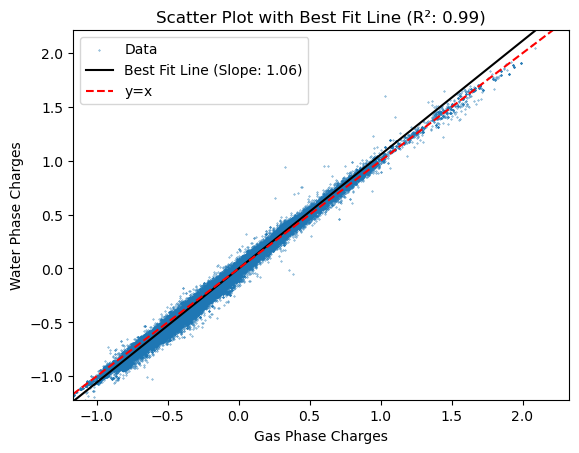

Slope of the best fit line: 1.0579137806577759
R² score: 0.9873076677848759


In [10]:
# Load data
df_water = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/water_test_models_over_test.parquet')
df_gas = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/test_models_gas.parquet')

# Align indices
df_gas.set_index('molblock', inplace=True)
df_water.set_index('molblock', inplace=True)
df_water = df_water.reindex(df_gas.index)

gas_model_charges_array = np.concatenate(df_gas['esp_model_charges'])
water_model_charges_array = np.concatenate(df_water['esp_model_charges'])

# Calculate R-squared
r2 = r2_score(gas_model_charges_array, water_model_charges_array)

# Plot scatter
plt.scatter(gas_model_charges_array, water_model_charges_array, s=0.1, label="Data")
plt.xlabel('Gas Phase Charges')
plt.ylabel('Water Phase Charges')

# Calculate and plot best fit line
slope, intercept = np.polyfit(gas_model_charges_array, water_model_charges_array, 1)
fit_line = np.poly1d([slope, intercept])

# Plotting limits based on data
x_min, x_max = gas_model_charges_array.min(), gas_model_charges_array.max()
y_min, y_max = water_model_charges_array.min(), water_model_charges_array.max()

x_vals = np.linspace(x_min, x_max, 500)
plt.plot(x_vals, fit_line(x_vals), color='black', label=f'Best Fit Line (Slope: {slope:.2f})')

# Add equality line
plt.plot([x_min, x_max], [x_min, x_max], color='red', linestyle='--', label='y=x')

# Set plot limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()
plt.title(f"Scatter Plot with Best Fit Line (R²: {r2:.2f})")
plt.show()

# Print slope and R-squared
print(f"Slope of the best fit line: {slope}")
print(f"R² score: {r2}")


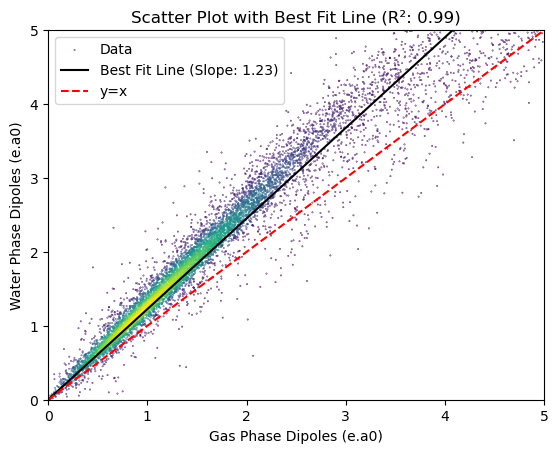

Slope of the best fit line constrained to pass through (0,0): 1.2258368026439026


In [11]:
# Load data
df_water = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/water_test_models_over_test.parquet')
df_gas = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/test_models_gas.parquet')

# Align indices
df_gas.set_index('molblock', inplace=True)
df_water.set_index('molblock', inplace=True)
df_water = df_water.reindex(df_gas.index)

gas_model_dipoles = df_gas['esp_model_dipoles']
water_model_dipoles = df_water['esp_model_dipoles']

# Filter data for dipoles between 0 and 5
gas_filtered = gas_model_dipoles[(gas_model_dipoles >= 0) & (gas_model_dipoles <= 5)]
water_filtered = water_model_dipoles[(gas_model_dipoles >= 0) & (gas_model_dipoles <= 5)]

# Calculate slope with the line constrained to pass through the origin
numerator = np.sum(gas_filtered * water_filtered)
denominator = np.sum(gas_filtered ** 2)
slope = numerator / denominator

# Define the new best fit line
fit_line = lambda x: slope * x

# Plot the scatter plot
xy = np.vstack([gas_filtered, water_filtered])
z = gaussian_kde(xy)(xy)
plt.scatter(gas_filtered, water_filtered, s=0.1, c=z, label="Data")
plt.xlabel('Gas Phase Dipoles (e.a0)')
plt.ylabel('Water Phase Dipoles (e.a0)')

# Plot the new best fit line
x_vals = np.linspace(0, 5, 500)
plt.plot(x_vals, fit_line(x_vals), color='black', label=f'Best Fit Line (Slope: {slope:.2f})')

# Add equality line
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='y=x')

# Set plot limits
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.legend()
plt.title(f"Scatter Plot with Best Fit Line (R²: {r2:.2f})")
plt.show()

# Print slope
print(f"Slope of the best fit line constrained to pass through (0,0): {slope}")



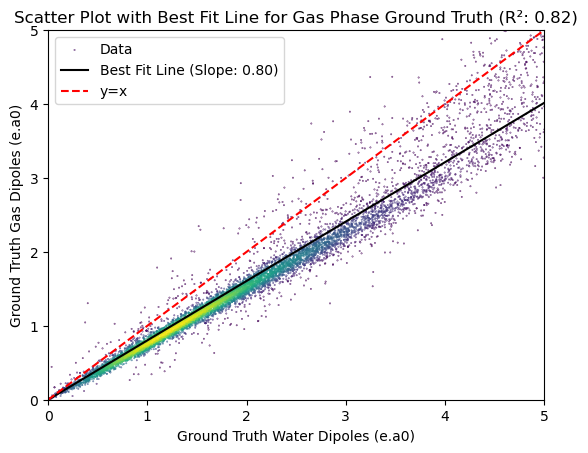

Slope of the best fit line constrained to pass through (0,0): 0.8031742487624361


In [12]:
# Load data
df_water = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/water_test_models_over_test.parquet')
df_gas = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmarking_new_charge_models/test_models_gas.parquet')

# Align indices
df_gas.set_index('molblock', inplace=True)
df_water.set_index('molblock', inplace=True)
df_water = df_water.reindex(df_gas.index)

gas_ground_truth_dipoles = df_gas['qm_dipoles_magnitude']

water_ground_truth_dipoles = df_water['qm_dipoles_magnitude']

# Filter data for dipoles between 0 and 5
water_ground_truth_dipoles = water_ground_truth_dipoles[(gas_model_dipoles >= 0) & (gas_model_dipoles <= 5)]
gas_ground_truth_dipoles = gas_ground_truth_dipoles[(gas_model_dipoles >= 0) & (gas_model_dipoles <= 5)]

r2 = r2_score(water_ground_truth_dipoles, gas_ground_truth_dipoles)


# Calculate slope with the line constrained to pass through the origin
numerator = np.sum(water_ground_truth_dipoles * gas_ground_truth_dipoles)
denominator = np.sum(water_ground_truth_dipoles ** 2)
slope = numerator / denominator

# Define the new best fit line
fit_line = lambda x: slope * x

# Plot the scatter plot
xy = np.vstack([water_ground_truth_dipoles, gas_ground_truth_dipoles])
z = gaussian_kde(xy)(xy)
plt.scatter(water_ground_truth_dipoles, gas_ground_truth_dipoles, s=0.1, c=z, label="Data")
plt.xlabel('Ground Truth Water Dipoles (e.a0)')
plt.ylabel('Ground Truth Gas Dipoles (e.a0)')

# Plot the new best fit line
x_vals = np.linspace(0, 5, 500)
plt.plot(x_vals, fit_line(x_vals), color='black', label=f'Best Fit Line (Slope: {slope:.2f})')

# Add equality line
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='y=x')

# Set plot limits
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.legend()
plt.title(f"Scatter Plot with Best Fit Line for Gas Phase Ground Truth (R²: {r2:.2f})")
plt.show()

# Print slope
print(f"Slope of the best fit line constrained to pass through (0,0): {slope}")



In [ ]:
data=  gas_ground_truth_dipoles - water_ground_truth_dipoles

# Sort the Series by the absolute values
sorted_series = data.abs().sort_values(ascending=False)

# Create a DataFrame from the sorted series
sorted_df = pd.DataFrame({
    'molblock': sorted_series.index,
    'qm_dipoles_magnitude': data.loc[sorted_series.index].values
})

# Display the result
print(sorted_df)


                                               molblock  qm_dipoles_magnitude
0     \n     RDKit          3D\n\n 16 16  0  0  0  0...         -2.243171e+00
1     \n     RDKit          3D\n\n 15 16  0  0  0  0...         -2.127487e+00
2     \n     RDKit          3D\n\n 20 21  0  0  0  0...         -2.089843e+00
3     \n     RDKit          3D\n\n 14 15  0  0  0  0...         -2.078443e+00
4     \n     RDKit          3D\n\n 17 17  0  0  0  0...         -1.987784e+00
...                                                 ...                   ...
8955  \n     RDKit          3D\n\n 12 12  0  0  0  0...         -4.029843e-06
8956  \n     RDKit          3D\n\n 18 17  0  0  0  0...          2.474534e-06
8957  \n     RDKit          3D\n\n  8  8  0  0  0  0...         -1.270307e-06
8958  \n     RDKit          3D\n\n 12 11  0  0  0  0...          1.170999e-06
8959  \n     RDKit          3D\n\n 22 26  0  0  0  0...         -1.045044e-07

[8960 rows x 2 columns]


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image, ImageDraw, ImageFont

def draw_molecule_with_label(molblock, dipole, label, font_size=20):
    """Generate an image of a molecule with a dipole label."""
    mol = Chem.MolFromMolBlock(molblock)
    img = Draw.MolToImage(mol, size=(300, 300))
    
    # Add label below the molecule image
    img_with_label = Image.new('RGB', (300, 350), "white")
    img_with_label.paste(img, (0, 0))
    
    draw = ImageDraw.Draw(img_with_label)
    font = ImageFont.load_default()
    text = f"{label}: {dipole:.3f} D"
    text_width, text_height = draw.textsize(text, font=font)
    text_position = ((300 - text_width) // 2, 310)  # Centered below the image
    draw.text(text_position, text, fill="black", font=font)
    
    return img_with_label

def create_side_by_side_images(sorted_df, gas_dipoles_df, water_dipoles_df):
    """Create a side-by-side visualization of molecules and their dipoles."""
    images = []
    for molblock in sorted_df['molblock'].head(10):  # Limit to top 10
        # Debugging: Check if molblock exists in both dataframes
        if molblock not in gas_dipoles_df.index or molblock not in water_dipoles_df.index:
            print(f"Molblock '{molblock}' not found in one of the dipole DataFrames.")
            continue
        
        gas_dipole = gas_dipoles_df.loc[molblock, 'qm_dipoles_magnitude']
        water_dipole = water_dipoles_df.loc[molblock, 'qm_dipoles_magnitude']
        
        gas_image = draw_molecule_with_label(molblock, gas_dipole, "Gas")
        water_image = draw_molecule_with_label(molblock, water_dipole, "Water")
        
        # Combine the two images side by side
        combined_image = Image.new('RGB', (600, 350), "white")
        combined_image.paste(gas_image, (0, 0))
        combined_image.paste(water_image, (300, 0))
        
        images.append(combined_image)
    
    # Concatenate all combined images vertically
    final_image_height = sum(img.size[1] for img in images)
    final_image = Image.new('RGB', (600, final_image_height), "white")
    y_offset = 0
    for img in images:
        final_image.paste(img, (0, y_offset))
        y_offset += img.size[1]
    
    return final_image

# Ensure molblock is set as index in gas and water dipole DataFrames
gas_ground_truth_dipoles.set_index('molblock', inplace=True)
water_ground_truth_dipoles.set_index('molblock', inplace=True)

# Generate the final image
final_image = create_side_by_side_images(sorted_df, gas_ground_truth_dipoles, water_ground_truth_dipoles)
final_image.show()  # To display the image


IndexingError: Too many indexers

In [14]:
df

,qm_dipoles_magnitude
molblock,
\n RDKit 3D\n\n 30 32 0 0 0 0 0 0 0 0999 V2000\n 0.6629 -1.6480 -0.1447 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.2846 -1.0333 1.2078 C 0 0 0 0 0 0 0 0 0 0 0 0\n 1.1673 0.1922 1.4694 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.9557 1.2250 0.3590 C 0 0 0 0 0 0 0 0 0 0 0 0\n -0.5110 1.6603 0.3251 C 0 0 0 0 0 0 0 0 0 0 0 0\n -1.4001 0.4408 0.0547 C 0 0 0 0 0 0 0 0 0 0 0 0\n -1.1599 -0.5429 1.1947 C 0 0 0 0 0 0 0 0 0 0 0 0\n -2.1017 -1.7319 1.0491 N 0 0 0 0 0 4 0 0 0 0 0 0\n -1.0114 -0.1831 -1.2913 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.4565 -0.6148 -1.2550 C 0 0 0 0 0 0 0 0 0 0 0 0\n 1.3449 0.6057 -0.9841 C 0 0 0 0 0 0 0 0 0 0 0 0\n 1.1811 1.5961 -1.9842 O 0 0 0 0 0 0 0 0 0 0 0 0\n 0.0827 -2.5518 -0.3545 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.7027 -1.9668 -0.1098 H 0 0 0 0 0 0 0 0 0 0 0 0\n 0.4177 -1.7596 2.0109 H 0 0 0 0 0 0 0 0 0 0 0 0\n 0.9329 0.6237 2.4423 H 0 0 0 0 0 0 0 0 0 0 0 0\n 2.2095 -0.1203 1.5062 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.5897 2.0907 0.5324 H 0 0 0 0 0 0 0 0 0 0 0 0\n -0.7930 2.1296 1.2683 H 0 0 0 0 0 0 0 0 0 0 0 0\n -0.6616 2.3940 -0.4612 H 0 0 0 0 0 0 0 0 0 0 0 0\n -2.4487 0.7441 0.0480 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.4258 -0.1003 2.1523 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.9641 -2.4051 1.8004 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.9229 -2.2019 0.1630 H 0 0 0 0 0 0 0 0 0 0 0 0\n -3.0745 -1.4311 1.0577 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.6523 -1.0349 -1.5433 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.1643 0.5531 -2.0750 H 0 0 0 0 0 0 0 0 0 0 0 0\n 0.7367 -1.0450 -2.2151 H 0 0 0 0 0 0 0 0 0 0 0 0\n 2.3889 0.2834 -0.9413 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.7167 1.3741 -2.7479 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1 2 1 0\n 1 10 1 0\n 1 13 1 0\n 1 14 1 0\n 2 3 1 0\n 2 7 1 0\n 2 15 1 0\n 3 4 1 0\n 3 16 1 0\n 3 17 1 0\n 4 5 1 0\n 4 11 1 0\n 4 18 1 0\n 5 6 1 0\n 5 19 1 0\n 5 20 1 0\n 6 7 1 0\n 6 9 1 0\n 6 21 1 0\n 7 8 1 0\n 7 22 1 0\n 8 23 1 0\n 8 24 1 0\n 8 25 1 0\n 9 10 1 0\n 9 26 1 0\n 9 27 1 0\n 10 11 1 0\n 10 28 1 0\n 11 12 1 0\n 11 29 1 0\n 12 30 1 0\nM CHG 1 8 1\nM END\n,-1.018647
\n RDKit 3D\n\n 24 27 0 0 0 0 0 0 0 0999 V2000\n -0.7047 -1.0502 -2.1810 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.7915 -0.8291 -2.2361 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.0502 -0.6718 -0.9500 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.2225 -1.5243 0.3112 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.0637 -0.2437 1.1371 C 0 0 0 0 0 0 0 0 0 0 0 0\n -0.1055 0.5889 -0.1201 C 0 0 0 0 0 0 0 0 0 0 0 0\n -1.0471 1.7153 -0.3450 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.4518 1.9369 -0.4002 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.8213 0.1160 2.3719 C 0 0 0 0 0 0 0 0 0 0 0 0\n -0.6749 -0.1051 2.4268 C 0 0 0 0 0 0 0 0 0 0 0 0\n -1.0680 -2.0650 -2.2511 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.3444 -0.3129 -2.6423 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.4263 -1.6964 -2.3431 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.1560 0.0565 -2.7344 H 0 0 0 0 0 0 0 0 0 0 0 0\n -0.5594 -2.2634 0.4678 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.1935 -2.0046 0.4034 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.5990 1.7426 -1.2725 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.5875 2.1069 0.5035 H 0 0 0 0 0 0 0 0 0 0 0 0\n 0.9155 2.4768 0.4115 H 0 0 0 0 0 0 0 0 0 0 0 0\n 0.9040 2.1125 -1.3645 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.4596 -0.6408 2.8038 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.1897 1.1253 2.4769 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.3107 0.7558 2.5686 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.0347 -1.0094 2.8953 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1 2 1 0\n 1 3 1 0\n 1 11 1 0\n 1 12 1 0\n 2 3 1 0\n 2 13 1 0\n 2 14 1 0\n 3 4 1 0\n 3 6 1 0\n 4 5 1 0\n 4 15 1 0\n 4 16 1 0\n 5 6 1 0\n 5 9 1 0\n 5 10 1 0\n 6 7 1 0\n 6 8 1 0\n 7 8 1 0\n 7 17 1 0\n 7 18 1 0\n 8 19 1 0\n 8 20 1 0\n 9 10 1 0\n 9 21 1 0\n 9 22 1 0\n 10 23 1 0\n 10 24 1 0\nM END\n,-0.017633
\n RDKit 3D\n\n 14 15 0 0 0 0 0 0 0 0999 V2000\n 1.6698 0.4839 -0.0519 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.2596 0.7746 -0.0018 C 0 0 0 0 0 0 0 0 0 0 0 0\n -0.4980 1.8836 0.0337 C 0 0 0 0 0 0 0 0 0 0 0 0\n -1.9149 1.4119 0.0772 C 0 0 0 0 0 0 0 0 0 0 0 0\n -1.8984 -0.0373 0.0636 N 0 0 0 0 0 0 0 0 0 0 0 0\n -0.6570 -0.3659 0.0188 C 0 0 0 0 0 0 0 0 0 0 0 0\n -0.1611 -1.6654 -0.0096 N 0 0 0 0 0 0 0 0 0 0 0 0\n 1.1170 -1.7517 -0.0534 C 0 0 0 0 0 0 0 0 0 0 0 0\n 2.0880 -

In [29]:
df_sorted

,qm_dipoles_magnitude
molblock,
\n RDKit 3D\n\n 16 16 0 0 0 0 0 0 0 0999 V2000\n 2.6548 -1.9404 0.5858 C 0 0 0 0 0 0 0 0 0 0 0 0\n 1.5432 -1.4741 -0.0651 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.4873 -0.7556 0.6316 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.7513 -0.6055 2.0330 C 0 0 0 0 0 0 0 0 0 0 0 0\n 1.8564 -1.0856 2.6010 N 0 0 0 0 0 4 0 0 0 0 0 0\n 2.8356 -1.7517 1.9549 C 0 0 0 0 0 0 0 0 0 0 0 0\n -0.6127 -0.2544 0.1757 N 0 0 0 0 0 2 0 0 0 0 0 0\n -0.9446 -0.4214 -1.4811 S 0 0 0 0 0 6 0 0 0 0 0 0\n 0.1603 0.2378 -2.1770 O 0 0 0 0 0 0 0 0 0 0 0 0\n -2.2246 0.2424 -1.6248 O 0 0 0 0 0 0 0 0 0 0 0 0\n -0.9778 -1.8612 -1.7374 O 0 0 0 0 0 1 0 0 0 0 0 0\n 3.4167 -2.4697 0.0304 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.4159 -1.6272 -1.1245 H 0 0 0 0 0 0 0 0 0 0 0 0\n 0.0533 -0.0927 2.6755 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.9605 -0.9350 3.5903 H 0 0 0 0 0 0 0 0 0 0 0 0\n 3.6755 -2.0848 2.5381 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1 2 2 0\n 1 6 1 0\n 1 12 1 0\n 2 3 1 0\n 2 13 1 0\n 3 4 2 0\n 3 7 1 0\n 4 5 1 0\n 4 14 1 0\n 5 6 2 0\n 5 15 1 0\n 6 16 1 0\n 7 8 1 0\n 8 9 2 0\n 8 10 2 0\n 8 11 1 0\nM CHG 3 5 1 7 -1 11 -1\nM END\n,-2.243171e+00
\n RDKit 3D\n\n 15 16 0 0 0 0 0 0 0 0999 V2000\n 0.6231 0.1547 -0.8931 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.8330 -1.0265 -1.5682 N 0 0 0 0 0 0 0 0 0 0 0 0\n 1.5975 -0.9330 -2.6939 C 0 0 0 0 0 0 0 0 0 0 0 0\n 2.1239 0.2632 -3.1258 C 0 0 0 0 0 0 0 0 0 0 0 0\n 2.8341 -0.1064 -4.3100 C 0 0 0 0 0 0 0 0 0 0 0 0\n 2.7376 -1.3952 -4.5553 N 0 0 0 0 0 0 0 0 0 0 0 0\n 1.9719 -1.8964 -3.5514 N 0 0 0 0 0 0 0 0 0 0 0 0\n 3.5951 0.7108 -5.2108 C 0 0 0 0 0 0 0 0 0 0 0 0\n 4.2108 1.3326 -5.9518 N 0 0 0 0 0 0 0 0 0 0 0 0\n 1.8728 1.4792 -2.3778 C 0 0 0 0 0 0 0 0 0 0 0 0\n 2.4317 2.9524 -2.7746 S 0 0 0 0 0 0 0 0 0 0 0 0\n 1.0752 1.2983 -1.2287 N 0 0 0 0 0 0 0 0 0 0 0 0\n 0.0148 0.0624 -0.0028 H 0 0 0 0 0 0 0 0 0 0 0 0\n 0.4401 -1.8877 -1.2363 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1.7725 -2.8796 -3.5486 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1 2 1 0\n 1 12 2 0\n 1 13 1 0\n 2 3 1 0\n 2 14 1 0\n 3 4 2 0\n 3 7 1 0\n 4 5 1 0\n 4 10 1 0\n 5 6 2 0\n 5 8 1 0\n 6 7 1 0\n 7 15 1 0\n 8 9 3 0\n 10 11 2 0\n 10 12 1 0\nM END\n,-2.127487e+00
\n RDKit 3D\n\n 20 21 0 0 0 0 0 0 0 0999 V2000\n 2.3532 -0.3914 2.4175 C 0 0 0 0 0 0 0 0 0 0 0 0\n 1.1856 0.2743 1.8203 N 0 0 0 0 0 4 0 0 0 0 0 0\n 0.5560 1.2970 2.3593 C 0 0 0 0 0 0 0 0 0 0 0 0\n -0.4666 1.6669 1.5595 N 0 0 0 0 0 0 0 0 0 0 0 0\n -0.4689 0.8323 0.4738 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.5588 -0.0495 0.6157 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.8103 -1.0716 -0.3960 C 0 0 0 0 0 0 0 0 0 0 0 0\n 2.0219 -2.1557 -0.2845 S 0 0 0 0 0 0 0 0 0 0 0 0\n -0.0756 -1.0266 -1.4485 N 0 0 0 0 0 0 0 0 0 0 0 0\n -1.0401 -0.1708 -1.5443 C 0 0 0 0 0 0 0 0 0 0 0 0\n -1.3076 0.8141 -0.5976 N 0 0 0 0 0 0 0 0 0 0 0 0\n -1.8529 -0.2032 -2.6100 N 0 0 0 0 0 0 0 0 0 0 0 0\n 3.1826 -0.3225 1.7244 H 0 0 0 0 0 0 0 0 0 0 0 0\n 2.5878 0.1039 3.3530 H 0 0 0 0 0 0 0 0 0 0 0 0\n 2.1104 -1.4340 2.5818 H 0 0 0 0 0 0 0 0 0 0 0 0\n 0.8088 1.7705 3.2901 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.0958 2.4258 1.7577 H 0 0 0 0 0 0 0 0 0 0 0 0\n -2.0639 1.4663 -0.7155 H 0 0 0 0 0 0 0 0 0 0 0 0\n -1.6701 -0.9130 -3.2966 H 0 0 0 0 0 0 0 0 0 0 0 0\n -2.6286 0.4161 -2.7436 H 0 0 0 0 0 0 0 0 0 0 0 0\n 1 2 1 0\n 1 13 1 0\n 1 14 1 0\n 1 15 1 0\n 2 3 2 0\n 2 6 1 0\n 3 4 1 0\n 3 16 1 0\n 4 5 1 0\n 4 17 1 0\n 5 6 2 0\n 5 11 1 0\n 6 7 1 0\n 7 8 2 0\n 7 9 1 0\n 9 10 2 0\n 10 11 1 0\n 10 12 1 0\n 11 18 1 0\n 12 19 1 0\n 12 20 1 0\nM CHG 1 2 1\nM END\n,-2.089843e+00
\n RDKit 3D\n\n 14 15 0 0 0 0 0 0 0 0999 V2000\n -2.2261 1.2333 0.9231 C 0 0 0 0 0 0 0 0 0 0 0 0\n -1.2010 1.9524 0.3235 N 0 0 0 0 0 0 0 0 0 0 0 0\n -0.2642 1.0284 -0.0100 C 0 0 0 0 0 0 0 0 0 0 0 0\n -0.7352 -0.1964 0.3867 C 0 0 0 0 0 0 0 0 0 0 0 0\n -1.9792 -0.0351 0.9741 N 0 0 0 0 0 0 0 0 0 0 0 0\n 0.0579 -1.3914 0.1604 C 0 0 0 0 0 0 0 0 0 0 0 0\n -0.3709 -2.9025 0.5753 S 0 0 0 0 0 0 0 0 0 0 0 0\n 1.2936 -1.1356 -0.4795 N 0 0 0 0 0 0 0 0 0 0 0 0\n 1.6377 0.0272 -0.8058 C 0 0 0 0 0 0 0 0 0 0 0 0\n 0.9493 1.1936 -0.6268 N 0 0 0 0 0 0 0 0 0 0 0 0\n 2.8053 0.2367 -1.4061 F 0 0 0 

In [13]:
gas_model_charges

array([-0.2419247 , -0.13747482, -0.2419247 , ...,  0.18792647,
        0.21391833,  0.21391833])

In [ ]:
df = df_esp
# Compute the magnitude of 'predicted_dipoles' if not already done
df['predicted_dipoles_magnitude'] = df['predicted_dipoles'].apply(lambda x: np.linalg.norm(x))

# Create a DataFrame with the dipole magnitudes
dipoles_df = df[['qm_dipoles_magnitude', 'predicted_dipoles_magnitude']].copy()

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    return m

# Remove any NaN or Inf values
dipoles_df = dipoles_df.replace([np.inf, -np.inf], np.nan).dropna()

# Plot using the density_scatter_plot function
plt.figure(figsize=(8, 6))
plot = density_scatter_plot(
    dipoles_df['qm_dipoles_magnitude'],
    dipoles_df['predicted_dipoles_magnitude'],
    s=5,
)
rmse = m(dipoles_df['qm_dipoles_magnitude'], dipoles_df['predicted_dipoles_magnitude'])
plt.annotate(f'{rmse}',
            xy=(10, 10), xycoords='figure pixels')

plt.xlabel('QM Dipole Magnitude (Debye) Test')
plt.ylabel('Predicted Dipole Magnitude (Debye) Test')
plt.title('Predicted Dipole Magnitude vs QM Dipole Magnitude')
plt.plot([0, 10], [0, 10], color='gray', linestyle='--')  # Equality line
plt.xlim(0, dipoles_df['qm_dipoles_magnitude'].max() + 1)
plt.ylim(0, dipoles_df['predicted_dipoles_magnitude'].max() + 1)
plt.savefig('predicted_vs_qm_dipoles.png', dpi=300)
plt.show()


In [6]:
print(rmse)

None


In [ ]:
# Assuming 'df' is your DataFrame containing 'predicted_charges' and 'mbis_charges'
# Flatten the charges across all molecules
predicted_charges_flat = np.concatenate(df['predicted_charges'].values)
mbis_charges_flat = np.concatenate(df['mbis_charges'].values)

# Create a DataFrame with the flattened charges
charges_df = pd.DataFrame({
    'Predicted Charges': predicted_charges_flat,
    'MBIS Charges': mbis_charges_flat
})

# Remove any NaN or Inf values
charges_df = charges_df.replace([np.inf, -np.inf], np.nan).dropna()

# Plot using the density_scatter_plot function
plt.figure(figsize=(8, 6))
density_scatter_plot(
    charges_df['MBIS Charges'],
    charges_df['Predicted Charges'],
    s=0.1,
)
plt.xlabel('MBIS Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted Charges vs MBIS Charges')

# Add an equality line
plt.plot([-1.5, 1.5], [-1.5, 1.5], color='gray', linestyle='--')  # Adjusted equality line to match axis limits

# Set axis limits
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add RMSE to the plot

rmse = m(charges_df['MBIS Charges'], charges_df['Predicted Charges'])
plt.annotate(f'{rmse}',
            xy=(10, 10), xycoords='figure pixels')
# Save and display the plot
plt.savefig('predicted_vs_mbis_charges_with_rmse.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot using the density_scatter_plot function
plt.figure(figsize=(8, 6))
density_scatter_plot(
    charges_df['MBIS Charges'],
    charges_df['Predicted Charges'],
    s=0.1,
)
plt.xlabel('MBIS Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted Charges vs MBIS Charges')
plt.plot([-1.5, 1.5], [-1, 1], color='gray', linestyle='--')  # Equality line
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.savefig('predicted_vs_mbis_charges.png', dpi=300)
plt.show()

In [3]:
def explode_charges(df, charge_columns, molecule_column='molecule'):
    rows = []
    for _, row in df.iterrows():
        charges_dict = {col: row[col] for col in charge_columns if row[col] is not None}
        n_charges = len(charges_dict[charge_columns[0]])  # Number of charges per molecule
        for i in range(n_charges):
            exploded_row = {col: charges_dict[col][i] for col in charge_columns}
            exploded_row[molecule_column] = row[molecule_column]
            exploded_row['element_index'] = i + 1  # Add index for the atom/element
            rows.append(exploded_row)
    return pd.DataFrame(rows)

# Define charge columns
charge_columns = ['mbis_charges', 'am1bcc_charges','riniker_monopoles', 'espaloma_charges','resp_charges']

# Explode the DataFrame
exploded_df = explode_charges(df, charge_columns)


In [ ]:
# Define the columns you want to compare against QM_HF_Dipoles
compare_columns = ['am1bcc_charges','riniker_monopoles', 'espaloma_charges','resp_charges']



# Initialize a PairGrid with col_wrap set to 3 for 3 columns per row
grid = sb.PairGrid(exploded_df, x_vars=compare_columns, y_vars=['mbis_charges'], height=4, aspect=0.8)
# Set axis limits
grid.set(xlim=(-1.5,1.5), ylim=(-1.5,1.5))


# Map the plots to the grid
grid = grid.map(density_scatter_plot, s=0.1)
grid = grid.map_offdiag(equalityline, color='gray', ls='-')
grid = grid.map_offdiag(m)
grid.map_diag(sb.kdeplot, color='gray')


# Display the plot
plt.savefig('comparison_of_charges.png', dpi=1000)
plt.show()

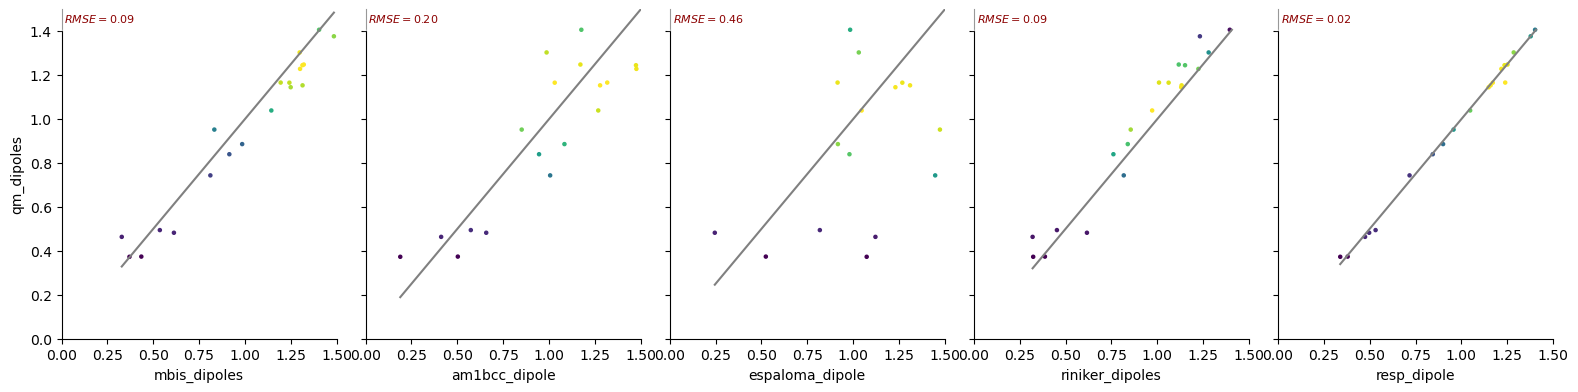

In [ ]:
# Define the columns you want to compare against QM_HF_Dipoles
compare_columns = ['mbis_dipoles','am1bcc_dipole','espaloma_dipole','riniker_dipoles','resp_dipole']


# Initialize a PairGrid with col_wrap set to 3 for 3 columns per row
grid = sb.PairGrid(df, x_vars=compare_columns, y_vars=['qm_dipoles'], height=4, aspect=0.8)

# Map the plots to the grid
grid = grid.map(kde)
grid = grid.map_offdiag(equalityline, color='gray', ls='-')
grid = grid.map_offdiag(m)
grid.map_diag(sb.kdeplot, color='gray')

# Set axis limits
grid.set(xlim=(0,1.5), ylim=(0,1.5))

# Display the plot
plt.savefig('comparison_of_dipoles.png', dpi=1000)
plt.show()

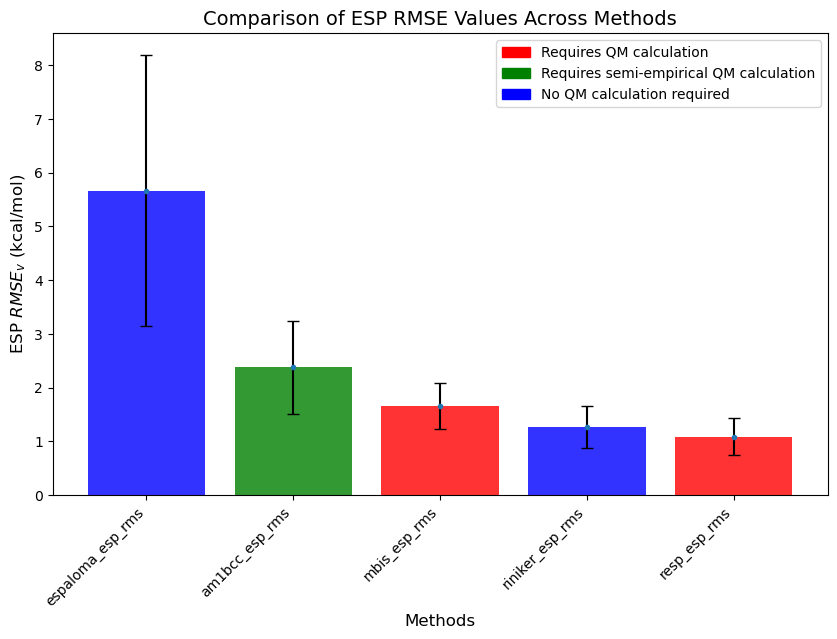

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the columns to compare
compare_columns = ['am1bcc_esp_rms', 'espaloma_esp_rms', 'riniker_esp_rms', 'mbis_esp_rms', 'resp_esp_rms']

# Assign colors based on the requirements for each method
color_map = {
    'am1bcc_esp_rms': 'green',   # Semi-empirical QM calculation
    'espaloma_esp_rms': 'blue',  # No QM calculation required
    'riniker_esp_rms': 'blue',   # No QM calculation required
    'mbis_esp_rms': 'red',       # QM calculation required
    'resp_esp_rms': 'red'        # QM calculation required
}

# Calculate mean and standard deviation for the columns
mean_values = df[compare_columns].mean()
std_dev_values = df[compare_columns].std()

# Create a DataFrame for easy sorting and plotting
mean_values_df = pd.DataFrame({
    'mean': mean_values,
    'std_dev': std_dev_values,
    'color': [color_map[col] for col in compare_columns]  # Map colors to methods
}).sort_values(by='mean', ascending=False)

# Plot the bar chart with error bars
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(
    x=mean_values_df.index,
    height=mean_values_df['mean'],
    color=mean_values_df['color'],  # Use the assigned colors
    alpha=0.8,
    label='Mean ESP RMSE'
)
plt.errorbar(
    x=mean_values_df.index,
    y=mean_values_df['mean'],
    yerr=mean_values_df['std_dev'],
    fmt=".", ecolor='black', capsize=4
)

# Add labels and formatting
plt.xticks(rotation=45, ha='right')
plt.ylabel('ESP $RMSE_{v}$ (kcal/mol)', fontsize=12)
plt.xlabel('Methods', fontsize=12)
plt.title('Comparison of ESP RMSE Values Across Methods', fontsize=14)

# Add a legend for context
red_patch = mpatches.Patch(color='red', label='Requires QM calculation')
green_patch = mpatches.Patch(color='green', label='Requires semi-empirical QM calculation')
blue_patch = mpatches.Patch(color='blue', label='No QM calculation required')

plt.legend(handles=[red_patch, green_patch, blue_patch], loc='upper right')

# Save the figure or display it
plt.savefig('esp_comparison.png', dpi=800, bbox_inches='tight')
plt.show()


In [ ]:
# Define the columns you want to compare against QM_HF_Dipoles
compare_columns = ['am1bcc_charges','espaloma_charges','riniker_monopoles','resp_charges']


# Initialize a PairGrid with col_wrap set to 3 for 3 columns per row
grid = sb.PairGrid(exploded_df, x_vars=compare_columns, y_vars=['qm_dipoles'], height=4, aspect=0.8)

# Map the plots to the grid
grid = grid.map(kde)
grid = grid.map_offdiag(equalityline, color='gray', ls='-')
grid = grid.map_offdiag(m)
grid.map_diag(sb.kdeplot, color='gray')

# Set axis limits
grid.set(xlim=(-1,1.5), ylim=(-1,1.5))

# Display the plot
plt.savefig('comparison_of_charges.png', dpi=1000)
plt.show()

17

In [13]:
df.to_csv('./sanity_check.csv')

In [14]:
df.iloc[0]

mbis_charges         [-0.44171691769759425, 0.19215883543444148, -0...
am1bcc_charges       [-0.15928235294117646, 0.13051764705882352, -0...
espaloma_charges     [-0.2646322256940253, 0.09048017793718506, -0....
riniker_monopoles    [-0.4982544779777527, 0.08591508120298386, -0....
resp_charges         [-0.2238, 0.1144, -0.3794, 0.1839, 0.4749, -0....
qm_dipoles                                                    0.372726
mbis_dipoles                                                  0.196034
am1bcc_dipole                                                 0.099876
espaloma_dipole                                               0.568253
riniker_dipoles                                               0.042476
resp_dipole                                                   0.179598
molecule             [C:1]1([H:10])([H:11])[C:2]([H:12])([H:13])[O:...
grid                 [[-4.959543008824821, -1.4344262395541767, 0.2...
Name: 0, dtype: object

In [15]:
df.iloc[2]

mbis_charges         [-0.273265076200354, 0.19154401299583018, -0.4...
am1bcc_charges       [-0.1094, 0.1304, -0.4296, 0.1141, -0.00559999...
espaloma_charges     [-0.2049732649077972, 0.10700781705478828, -0....
riniker_monopoles    [-0.31433048844337463, 0.07334760576486588, -0...
resp_charges         [-0.049, 0.1191, -0.4819, 0.4558, -0.3094, -0....
qm_dipoles                                                    1.245573
mbis_dipoles                                                  0.695169
am1bcc_dipole                                                 0.780104
espaloma_dipole                                               0.978258
riniker_dipoles                                                0.13114
resp_dipole                                                   0.653697
molecule             [C:1]1([H:9])([H:10])[C:2]([H:11])([H:12])[O:3...
grid                 [[-5.238149148667286, 0.1674437813895311, 0.15...
Name: 2, dtype: object

/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


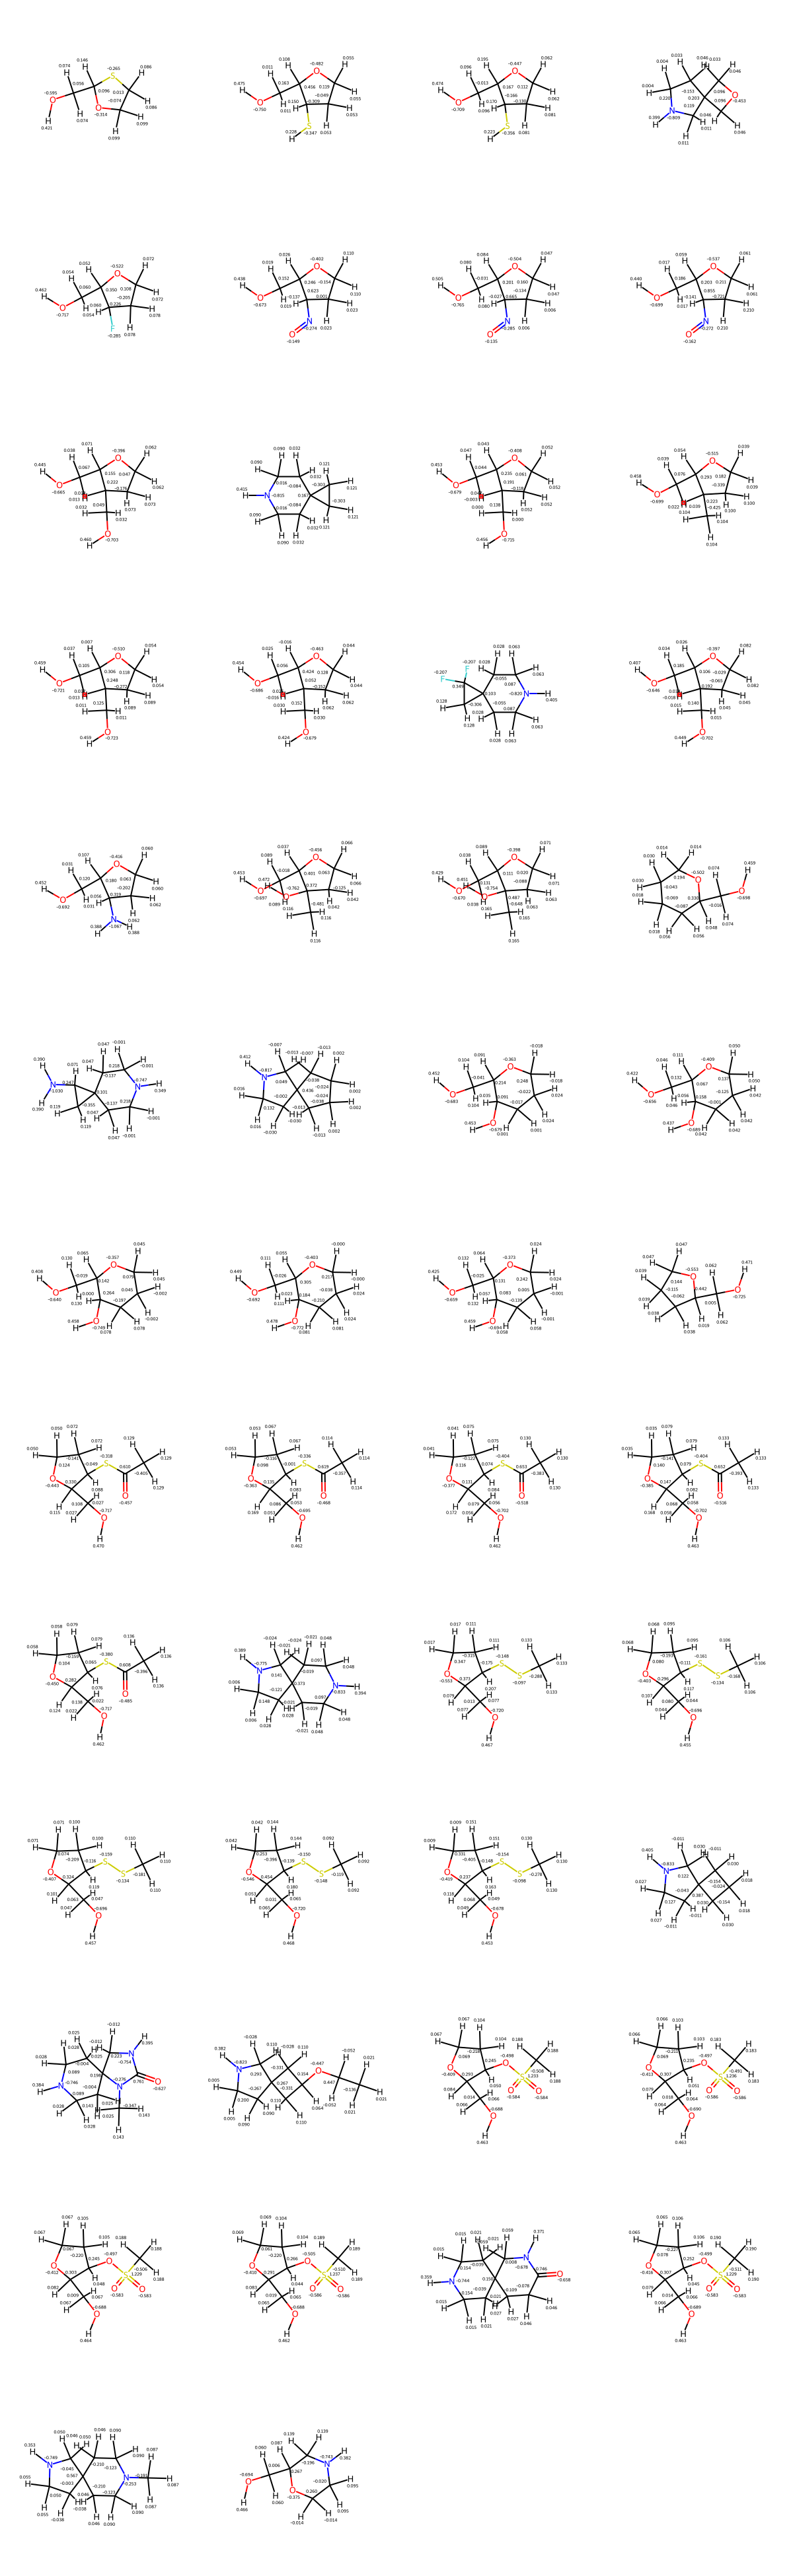

In [31]:
draw_mols  = list(range(1,80))
images = []
for mol in draw_mols:
    openff_molecule = Molecule.from_mapped_smiles(df.iloc[mol]['molecule'], allow_undefined_stereo=True)
    rdkit_mol = openff_molecule.to_rdkit()
    resp_charges =  df.iloc[mol]['resp_charges']
    for i, atom in enumerate(rdkit_mol.GetAtoms()):
        lbl = '%.3f' % (resp_charges[i])
        atom.SetProp('atomNote', lbl)
    images.append(rdkit_mol)

img = Draw.MolsToGridImage(images, molsPerRow=4, subImgSize=(300, 300))
img

/scratch/ipykernel_13008/2251617336.py:1: AtomMappingWarning: Warning! Fully mapped SMILES pattern passed to `from_smiles`. The atom map is stored as a property in `Molecule._properties`, but these indices are NOT used to determine atom ordering. To use these indices for atom ordering, use `Molecule.from_mapped_smiles`.
  openff_molecule = Molecule.from_smiles(df.iloc[1]['molecule'], allow_undefined_stereo=True)


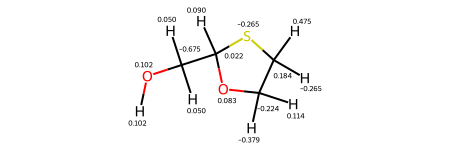

In [17]:


openff_molecule = Molecule.from_smiles(df.iloc[1]['molecule'], allow_undefined_stereo=True)
rdkit_mol = openff_molecule.to_rdkit()
resp_charges =  df.iloc[0]['resp_charges']
for i, atom in enumerate(rdkit_mol.GetAtoms()):
    lbl = '%.3f' % (resp_charges[i])
    atom.SetProp('atomNote', lbl)
rdkit_mol

In [6]:
from chargecraft.storage.storage import MoleculePropRecord, MoleculePropStore
from MultipoleNet import load_model, build_graph_batched, D_Q
riniker_model = load_model()


2024-11-20 14:32:42.788864: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [7]:
prop_store = MoleculePropStore('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/ESP_rebuilt.db')
prop_store.list()

['OCC1OCCS1',
 'OCC1OCCC1F',
 'OCC1OCCC1S',
 'O=NC1CCOC1CO',
 'OCC1OCCC1(F)F',
 'C1CC2(CN1)COC2',
 'O=[N+]([O-])C1CCOC1CO',
 'NC1CCOC1CO',
 '[N-]=[N+]=NC1CCOC1CO',
 'CC1CCOC1CO',
 'OCC1CCOC1CO',
 'C1CC2(CCN1)CC2',
 'CC1(O)CCOC1CO',
 'FC1(F)CC12CCNCC2',
 '[NH3+]C1(O)CCOC1CO',
 'CC(=O)SC1CCOC1CO',
 'NC1CC12CCNCC2',
 'C1CCC2(C1)CCNC2',
 'C[NH+](C)C1CCOC1CO',
 'CP(=O)([O-])OC1CCOC1CO',
 'OCC1CCCCO1',
 'OCC1OCCCC1O',
 'OCC1CCCO1',
 '[NH3+]CCSSC1CCOC1CO',
 'CSSC1CCOC1CO',
 '[N-]=[N+]=NCC1CCOC1CO',
 'C1CC2(CC[NH2+]CC2)CN1',
 'C1CC2(CCN1)CCNC2',
 'C1CC2(CCN1)C1C[NH2+]CC12',
 'C1CC2(C1)CCNC2',
 'CN1C(=O)NCC12CCNCC2',
 'O=C1CCC2(CCNCC2)CN1',
 'CCOC1CC2(CCNC2)C1',
 '[NH3+]C1CCOC1CO',
 'CS(=O)(=O)OC1CCOC1CO',
 'CN1CCC2(CCNC2)CC1',
 'CN1CCOCC12CCNCC2',
 'CC1CC2(CCNCC2)CN1',
 'C[NH+]1CCOCC12CCNCC2',
 'C1CC2(CCNC2)CN1',
 'C=C1CCOC1CO',
 'OCC1CNCCO1',
 'C1CC2(CN1)CNC2',
 'OCC1OCCC(O)C1O',
 'C1CC2(CCN1)COC2',
 'N#CSC1CCOC1CO',
 'OCC1OCCC1O',
 'NC1(O)CCOC1CO',
 'C[NH+]1CC2(CCNC2)C1',
 'NCC1CC12CCNCC2',


In [8]:
molecule = prop_store.retrieve(smiles='OCC1OCCS1')

In [21]:
mapped_smiles = molecule[0].tagged_smiles
conformer_quantity = molecule[0].conformer_quantity
openff_mol = Molecule.from_mapped_smiles(mapped_smiles=mapped_smiles, allow_undefined_stereo=True)
openff_mol.add_conformer(conformer_quantity)
rdkit_conformer = openff_mol.to_rdkit()
elements = [a.GetSymbol() for a in rdkit_conformer.GetAtoms()]
coordinates = rdkit_conformer.GetConformer(0).GetPositions().astype(np.float32)

In [22]:
from espaloma_charge.openff_wrapper import EspalomaChargeToolkitWrapper

toolkit_wrapper = EspalomaChargeToolkitWrapper()

openff_mol.assign_partial_charges('espaloma-am1bcc', toolkit_registry=toolkit_wrapper)

/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/espaloma_charge/openff_wrapper.py:112: IncorrectNumConformersWarning: Molecule 'Molecule with name '' and SMILES '[H][O][C]([H])([H])[C]1([H])[O][C]([H])([H])[C]([H])([H])[S]1'' has 1 conformers, but charge method 'espaloma-am1bcc' expects exactly 0.
  self._check_n_conformers(
/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [23]:
openff_mol.partial_charges

Magnitude,[0.10370072921117147 -0.2081667164961497 -0.2932848314444224 0.0993407612045606 -0.377932874361674 0.18753446837266285 -0.6843801120917002 0.11059750070174536 0.11059750070174536 0.14053039451440175 0.14053039451440175 0.11685428967078527 0.08291831811269125 0.08291831811269125 0.38824185927708943]
Units,elementary_charge


In [24]:
molecule[0].mbis_charges_quantity

Magnitude,[[0.18318003045342993] [-0.2598634431943842] [-0.2332459155121245] [0.20927145531226463] [-0.43504133705820264] [0.13056605529786205] [-0.6688152668970049] [0.07737889180214504] [0.05457897684401664] [0.13401891491973164] [0.1423913543310807] [0.08841998642261444] [0.06529236728358229] [0.05497735657839933] [0.4569253980177039]]
Units,elementary_charge


In [9]:
molecule[0].esp_quantity

Magnitude,[[-0.01648513102157345] [-0.016546033230945945] [-0.02072616199469479] ... [0.01057195132719535] [0.007424593137120183] [0.00958607969085623]]
Units,hartree/elementary_charge


In [25]:
test_mol = prop_store.retrieve(smiles='[H][O][C]([H])([H])[C]1([H])[O][C]([H])([H])[C]([H])([H])[C]1([F])[F]')

In [26]:
test_mol[0].mbis_charges_quantity

Magnitude,[[-0.44171691769759425] [0.19215883543444148] [-0.430959238273838] [0.03781578130692773] [0.6978987768156796] [-0.30650265033868407] [-0.3107830714583748] [0.15108314303037665] [-0.6811987500288164] [0.15312256372432925] [0.15044177661520136] [0.07560967345827511] [0.04216704369202228] [0.09957404226914512] [0.06347353375309955] [0.053515296114191986] [0.4542960673386356]]
Units,elementary_charge


In [27]:
test_mol[0].conformer_quantity

Magnitude,[[-1.2547183367504817 0.6822987538777442 -0.679712352633502] [-1.8584591090954932 -0.3010141536322885 0.3355887986820094] [-0.8930008576440169 -0.41681652686970194 1.349742201669475] [0.35976165601028 -0.44634367330270847 0.7290831364652852] [0.23729215263382686 0.5958956408167781 -0.38179174780906977] [0.7195565866835817 1.792058862856065 0.01817445372242227] [0.970780213120398 0.24513640572788986 -1.4536694043688903] [1.4663905652221885 -0.18563376746993837 1.7253457776330943] [1.6313506808380474 -1.3432699410383506 2.4945936707851035] [-1.590600632988975 1.69524064268325 -0.5040182371349595] [-1.4585514451470714 0.41770197263784703 -1.7084425716161988] [-2.777193690460835 0.04851399300960859 0.7820652637140221] [-2.039797989653381 -1.2718649325337603 -0.11840522660114258] [0.5256388780668123 -1.4125088261313705 0.258249348221053] [1.1950364291287923 0.6671281110917531 2.3371288053091726] [2.3778050223537797 0.055987594509838125 1.183890612957039] [2.2221856888597364 -1.1661256683110468 3.212441586588853]]
Units,angstrom


In [28]:
test_off = Molecule.from_mapped_smiles(mapped_smiles=test_mol[0].tagged_smiles, allow_undefined_stereo=True)
test_off.add_conformer(test_mol[0].conformer_quantity.to(unit.bohr))

1

In [29]:
test_off.assign_partial_charges('am1bcc')
test_off.partial_charges

Magnitude,[-0.15928235294117646 0.13051764705882352 -0.4214823529411764 0.05421764705882354 0.39171764705882356 -0.23168235294117648 -0.23168235294117648 0.13451764705882352 -0.5896823529411764 0.08581764705882353 0.08581764705882353 0.05981764705882354 0.05981764705882354 0.09081764705882353 0.06331764705882353 0.06331764705882353 0.41411764705882353]
Units,elementary_charge


In [2]:
from ChargeAPI.API_infrastructure.esp_request.module_version_esp import handle_esp_request
molblock = "\n     RDKit          3D\n\n 17 17  0  0  0  0  0  0  0  0999 V2000\n   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0\n    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6314   -1.3433    2.4946 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5906    1.6952   -0.5040 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4586    0.4177   -1.7084 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.7772    0.0485    0.7821 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0398   -1.2719   -0.1184 H   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5256   -1.4125    0.2582 H   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1950    0.6671    2.3371 H   0  0  0  0  0  0  0  0  0  0  0  0\n    2.3778    0.0560    1.1839 H   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2222   -1.1661    3.2124 H   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2  1  0\n  1  5  1  0\n  1 10  1  0\n  1 11  1  0\n  2  3  1  0\n  2 12  1  0\n  2 13  1  0\n  3  4  1  0\n  4  5  1  0\n  4  8  1  0\n  4 14  1  0\n  5  6  1  0\n  5  7  1  0\n  8  9  1  0\n  8 15  1  0\n  8 16  1  0\n  9 17  1  0\nM  END\n"
result = handle_esp_request(charge_model='RIN',
                   conformer_mol=molblock)
result

grid is

total grid command:
conda run -n riniker python /mnt/nfs/home/nca121/ChargeAPI_test/ChargeAPI/ChargeAPI/esp_models/riniker_model.py                 --conformer '
     RDKit          3D

 17 17  0  0  0  0  0  0  0  0999 V2000
   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6314   -1.3433    2.4946 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5906    1.6952   -0.5040 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4586    0.4177   -1.7084 H   0  0  0  0  0  0  0  0  0  0  

{'esp_result': '[0.01217331464208723, -0.00010272395190474523, 0.0100705821050963, 0.01310537506679281, 0.01571480821942189, 0.0073920179117542735, 0.0043291605210341476, -0.006863911642694535, 0.0017230035780839799, -0.0003380744616278165, -0.014517148112841466, 0.015232874226689347, 0.006478526776316914, -0.005073815530142122, 0.017667564305937883, 0.013857200398152086, 0.012838762955913212, 0.015487776496165324, 0.018602506643552, -0.03569856615400988, -0.02244141148953538, -0.02706344064247599, -0.0292622293600274, -0.037421310361843575, -0.01951555096982688, -0.014329323995224293, -0.0270822607614707, -0.03607017135320963, -0.02173254952561824, -0.018437986368338752, -0.0022178471601935375, -0.009561948749866827, -0.010935039951214911, -0.01281840052098311, -0.014415750301237113, -0.012490564456538983, -0.006832402862534592, -0.01629970407148981, -0.017128730239976284, -0.015154896038575918, -0.008792173851160911, -0.011257383814923678, -0.01915258055774006, -0.017429974137167938,

In [9]:
import os
import json

mol_grid = None

dict_item = {}
dict_item['abc'] = [molblock, mol_grid]
json_file = os.path.join('molblocks.json')
json.dump(dict_item, open(json_file, "w"))
result = handle_esp_request(
    charge_model='RIN',
    conformer_mol='/mnt/storage/nobackup/nca121/molblocks.json',
    broken_up=True,
    batched= True
)
result


grid is

total grid command:
conda run -n riniker python /mnt/nfs/home/nca121/ChargeAPI_test/ChargeAPI/ChargeAPI/esp_models/riniker_model.py                 --conformer '/mnt/storage/nobackup/nca121/molblocks.json'                 --batched                  --broken_up                                  --not_batched_grid
errors are:
ERROR:root:molbock is 
     RDKit          3D

 17 17  0  0  0  0  0  0  0  0999 V2000
   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6314   -1.343

{'file_path': '/mnt/storage/nobackup/nca121/molblock_esp.json',
 'error': 'ERROR:root:molbock is \n     RDKit          3D\n\n 17 17  0  0  0  0  0  0  0  0999 V2000\n   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0\n    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6314   -1.3433    2.4946 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5906    1.6952   -0.5040 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4586    0.4177   -1.7084 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.7772    0.0485    0.7821 H   0  0  0  0  0  0  